In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


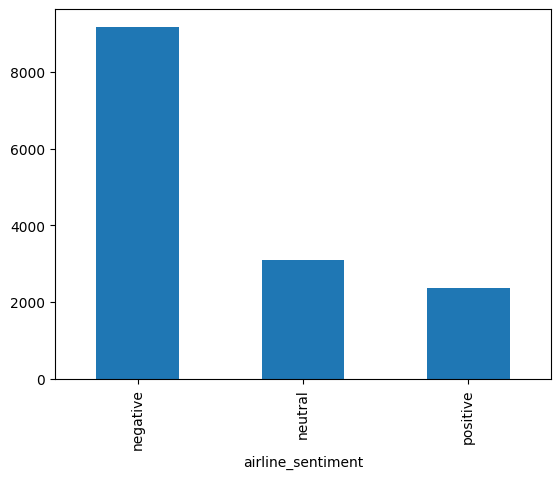

In [6]:
# visuliazing the value counts
import matplotlib.pyplot as plt
df['airline_sentiment'].value_counts().plot(kind='bar')
plt.show()

In [7]:
#apply smote to balance the data
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

#splitting the data

X=df['text']
y=df['airline_sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#apply bert to convert text to vectors
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('bert-base-nli-mean-tokens')




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
X_train

,text
750,@united you are offering us 8 rooms for 32 peo...
6875,@JetBlue JFK NYC staff is amazing. The #lax Je...
7598,"@JetBlue well, the last update was in the righ..."
14124,@AmericanAir flight 3056 still sitting at DFW ...
6187,@southwestair is your companion pass broken to...
...,...
5191,@SouthwestAir replacing @vitaminwater with bee...
13418,@AmericanAir at LAX and your service reps just...
5390,@SouthwestAir Been on hold for over an hour - ...
860,@united we would...how do I contact you to dis...


In [9]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.utils import to_categorical

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['text_cleaned'] = df['text'].astype(str).apply(clean_text)

In [13]:
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

In [14]:
# prompt: df['sentiment_encoded'] value count

df['sentiment_encoded'].value_counts()

,count
sentiment_encoded,
0,9178
1,3099
2,2363


In [16]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming `df` is already defined with columns `text_cleaned` and `sentiment_encoded`

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text_cleaned'].tolist(),
    df['sentiment_encoded'].tolist(),
    test_size=0.2,
    random_state=42
)

# Define custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Check for GPU and move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare datasets and dataloaders
max_len = 128
batch_size = 64

train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, max_len)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_dataloader) * 3  # 3 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training loop
epochs = 25
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}: Training loss: {avg_train_loss:.4f}")

    # Validation loop
    model.eval()
    val_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Validation loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1: Training loss: 0.5977
Validation loss: 0.4806, Accuracy: 0.8094
Epoch 2: Training loss: 0.4022
Validation loss: 0.4655, Accuracy: 0.8207
Epoch 3: Training loss: 0.2812
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 4: Training loss: 0.2296
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 5: Training loss: 0.2313
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 6: Training loss: 0.2305
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 7: Training loss: 0.2298
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 8: Training loss: 0.2280
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 9: Training loss: 0.2307
Validation loss: 0.5138, Accuracy: 0.8149
Epoch 10: Training loss: 0.2301
Validation loss: 0.5138, Accuracy: 0.8149


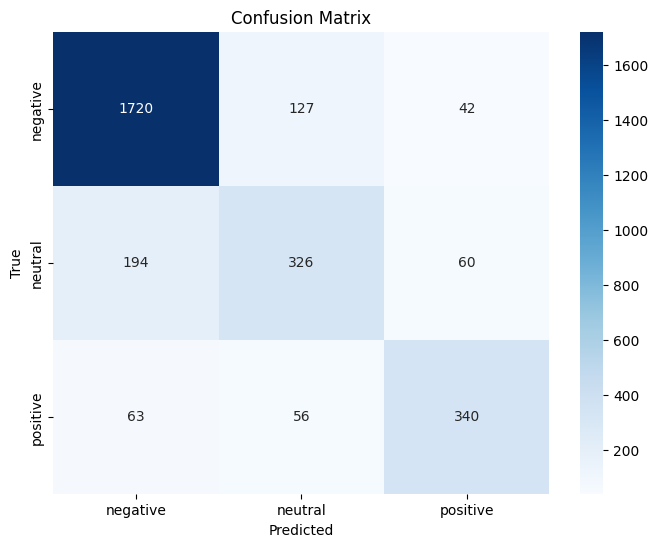

In [17]:
# prompt: print confusion matrix of above

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'predictions' and 'true_labels' are available from the previous training loop
cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()